## Analyse multivarier ou bivarier, relation entre variables quantitatives

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.style.use('ggplot')  # le style ggplot est un paquege de R pour affiné les graphique

In [232]:
from warnings import filterwarnings
filterwarnings('ignore')  # code optionnel

In [233]:
sns.get_dataset_names()

# dataframe proposé par la librairie seaborn

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [234]:
titanic_df = sns.load_dataset('titanic')
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [235]:
titanic_df.shape

(891, 15)

In [236]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [237]:
# REMPLACER LES VARIABLES ET LES NAN PAR D'AUTRE NOM DE VARIABLE EXEMPLE

# DataFrame["variable"] = DataFrame.variable.replace(2.0:"married", 3.0:"divorced", np.nan:"Missing")

# DataFrame.fillna( DataFrame.maen(), inplace=True)       remplacé les NaN par la moyenne

In [238]:
titanic_df = titanic_df.rename(columns=
                  {'survived':'Survivant','parch':'dessécher',
                   'fare':'tarif',
                   'embarked':'embarqué','who':'genre',
                   'adult_male':'mâle_adulte','deck':'pont',
                   'embark_town':'ville_embarquement','alive':'vivante','alone':'seule'})

In [239]:
titanic_df.loc[titanic_df[['Survivant',
                           'pclass','sex','age',
                           'sibsp','dessécher','tarif',
                           'embarqué','class','genre',
                           'mâle_adulte','pont','ville_embarquement','vivante','seule']].duplicated(keep=False)]

,Survivant,pclass,sex,age,sibsp,dessécher,tarif,embarqué,class,genre,mâle_adulte,pont,ville_embarquement,vivante,seule
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
29,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
32,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


In [240]:
titanic_df.drop_duplicates(subset=['Survivant',
                           'pclass','sex','age',
                           'sibsp','dessécher','tarif',
                           'embarqué','class','genre',
                           'mâle_adulte','pont','ville_embarquement','vivante','seule'], inplace=True, ignore_index=True)

In [241]:
titanic_df.loc[titanic_df['age'].isnull(), 'age'] = round(titanic_df['age'].mean(),2)

# Pour remplacer les valeurs manquantes quantitatives d'une dataFrame: dataframe.fillna(dataframe.maen(), inplace=True) 

In [242]:
titanic_df = titanic_df.drop(['pont'],axis=1)

In [243]:
titanic_df

,Survivant,pclass,sex,age,sibsp,dessécher,tarif,embarqué,class,genre,mâle_adulte,ville_embarquement,vivante,seule
0,0,3,male,22.00,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.00,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.00,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.00,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.00,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,0,3,female,39.00,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
780,1,1,female,19.00,0,0,30.0000,S,First,woman,False,Southampton,yes,True
781,0,3,female,29.87,1,2,23.4500,S,Third,woman,False,Southampton,no,False
782,1,1,male,26.00,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


## Relation entre variables quantitatives

## 1- Nuage de point et coefficient de correlation de pearson

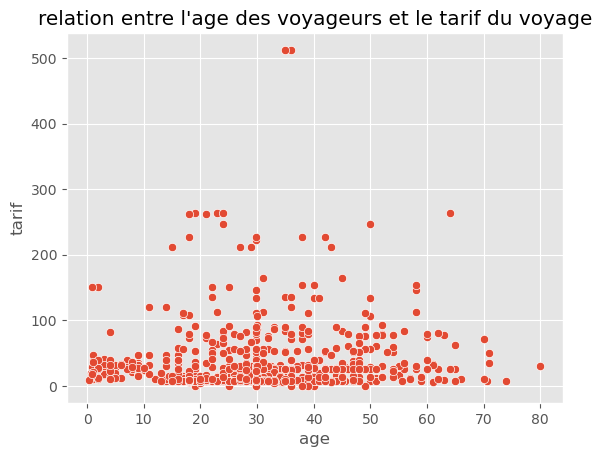

In [244]:
# Relation entre la variable "age" et la variable "tarif" avec des nuages de point

sns.scatterplot(x='age',y='tarif', data = titanic_df)
plt.title("relation entre l'age des voyageurs et le tarif du voyage")
plt.show()

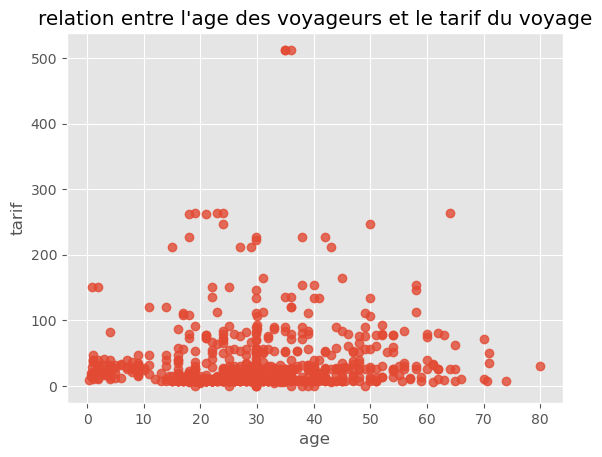

In [245]:
# Nuage de point entre la variable "age" et "tarif"

sns.regplot(x='age',y='tarif',fit_reg=False, data = titanic_df)
plt.title("relation entre l'age des voyageurs et le tarif du voyage")
plt.show()

# L'argument fit_reg=False permet d'afficher unique les nuages de point. parcontre le fit_reg=True affice la droite de
# regression lineaire

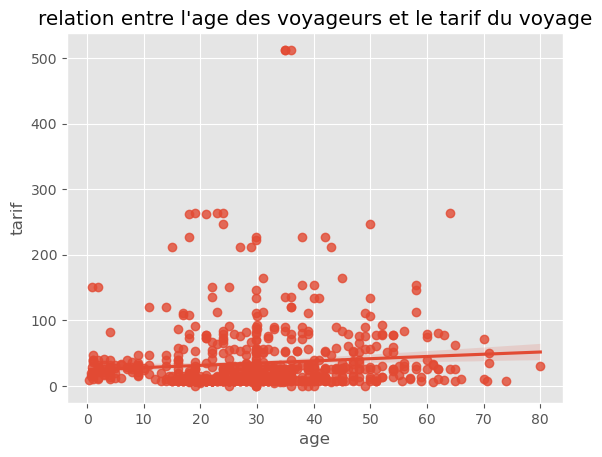

In [246]:
# Regression lineaire simple entre la variable "age" et "tarif"

sns.regplot(x='age',y='tarif',fit_reg=True, data = titanic_df)
plt.title("relation entre l'age des voyageurs et le tarif du voyage")
plt.show()

In [247]:
# Coefficient de pearson entre les variable "age" et "tarif". permet de mesurer la force de relation entres deux variables

# lorsque le Coefficient de pearson = 0 aucune correlation entre les variables. 
# Lorsque le Coefficient de pearson = 1 existance d'une correlation entre les variables
# le Coefficient de pearson entre deux variables quantitative est egale a leur covariance diviser par le produit de leur 
# ecart-types,il est sans dimention et varie de -1 pour une parfaite correlation negative et de 1 une parfaite correltopn(+)

stats.pearsonr(titanic_df['age'], titanic_df['tarif'])

# la première valeur de ce tuple represente le Coefficient de pearson = 0.08 et la deuxieme valeur c'est la P-valeur=0.01
# nous voyon que le coefficien de correlation de pearson entre l'age et le prix est egale a 0.08 pour une p-valeur = 0.01
# donc nous pouvons conclure qu'il existe une correlation negative, casiment faible et statistiquement significative 
# puisque la p-valeur est inferieur a 0.5. donc il n'existe pas de correlation entre l'age et le tarif
# correlation moyenne = moderablement forte; correlation faible= casiment faible; et tres forte

PearsonRResult(statistic=0.08924855648692324, pvalue=0.012420637152712096)

In [248]:
# Pour aafficher la MATRICE DE CRRRELATION de toutes les variables

titanic_df.corr()

,Survivant,pclass,age,sibsp,dessécher,tarif,mâle_adulte,seule
Survivant,1.000000,-0.332658,-0.080679,-0.036589,0.070307,0.246769,-0.528502,-0.176595
pclass,-0.332658,1.000000,-0.340413,0.088014,0.040296,-0.549216,0.066816,0.109545
age,-0.080679,-0.340413,1.000000,-0.280795,-0.188444,0.089249,0.276276,0.196334
sibsp,-0.036589,0.088014,-0.280795,1.000000,0.381433,0.135147,-0.274521,-0.609502
dessécher,0.070307,0.040296,-0.188444,0.381433,1.000000,0.191942,-0.347186,-0.571087
tarif,0.246769,-0.549216,0.089249,0.135147,0.191942,1.000000,-0.165209,-0.246619
mâle_adulte,-0.528502,0.066816,0.276276,-0.274521,-0.347186,-0.165209,1.000000,0.387850
seule,-0.176595,0.109545,0.196334,-0.609502,-0.571087,-0.246619,0.387850,1.000000


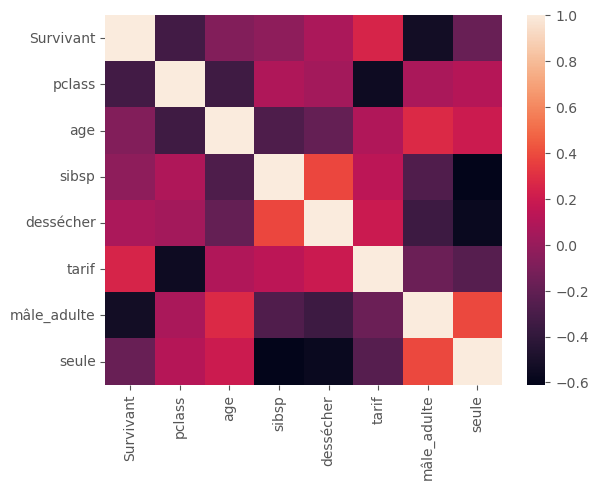

In [249]:
# Afficher une CARTE DE CORRELATION de tous les variables

sns.heatmap(titanic_df.corr());

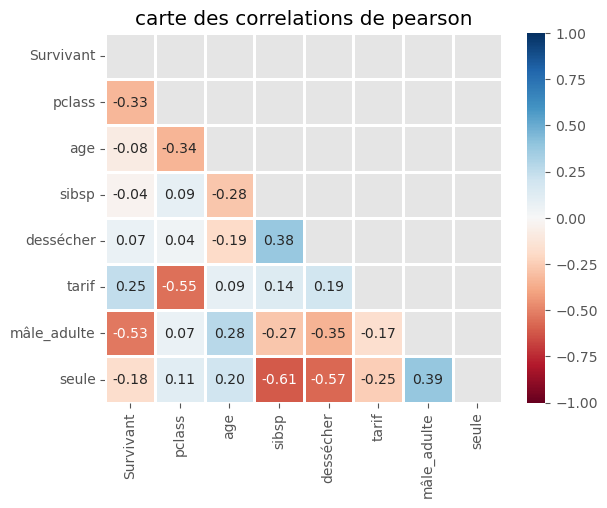

In [250]:
# CARTE DE CORRELATION AMELIOREE

mask = np.triu(np.ones_like(titanic_df.corr(), dtype='bool'))
sns.heatmap(titanic_df.corr(), mask=mask, center=0,
            cmap="RdBu", linewidths=1,
            annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title("carte des correlations de pearson")
plt.show()

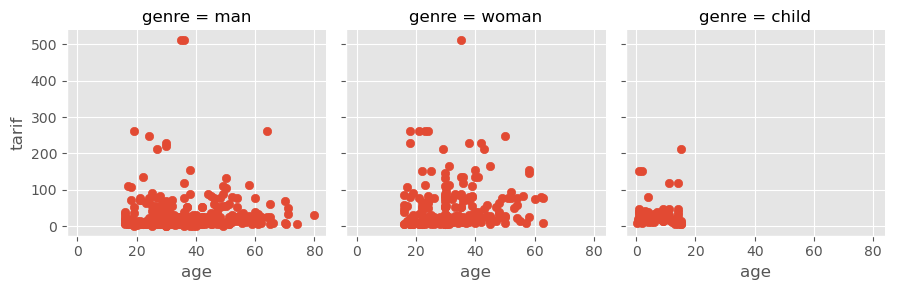

In [251]:
# Relation entre les variables "age" et "tarif" selon le genre ou discretiser selon le genre

sns.FacetGrid(titanic_df, col="genre").map(plt.scatter,'age','tarif').add_legend();


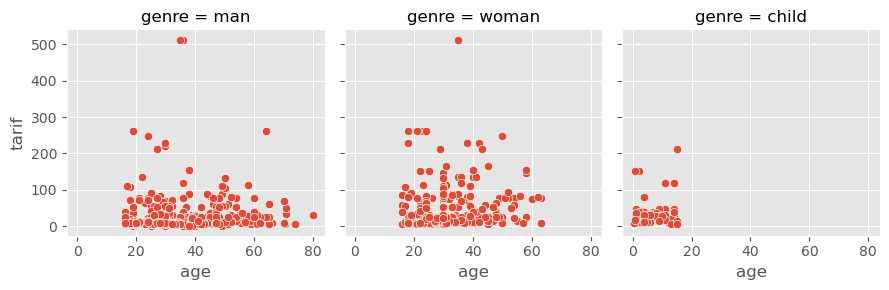

In [252]:
# Relation entre les variables "age" et "tarif" selon le genre ou discretiser selon le genre, autre ligne de code

g = sns.FacetGrid(titanic_df, col="genre")
g.map(sns.scatterplot, "age", "tarif");

In [253]:
# Coefficient de correlation de pearson entre les variable "age" et "tarif" selon le genre

stats.pearsonr(titanic_df[titanic_df.genre=='woman']['age'],
               titanic_df[titanic_df.genre=='woman']['tarif'])

# on peu dire la correlation est plus forte chez les femmes qui est de 0.13 et chez les hommes de 0.10

PearsonRResult(statistic=0.1334980866597369, pvalue=0.034521984581927984)

In [254]:
# Coefficient de correlation de pearson entre les variable "age" et "tarif" selon le genre

stats.pearsonr(titanic_df[titanic_df.genre=='man']['age'],
               titanic_df[titanic_df.genre=='man']['tarif'])

# # on peu dire la correlation est plus forte chez les femmes qui est de 0.13 et chez les hommes de 0.10

PearsonRResult(statistic=0.10955331778719132, pvalue=0.019959445306653775)

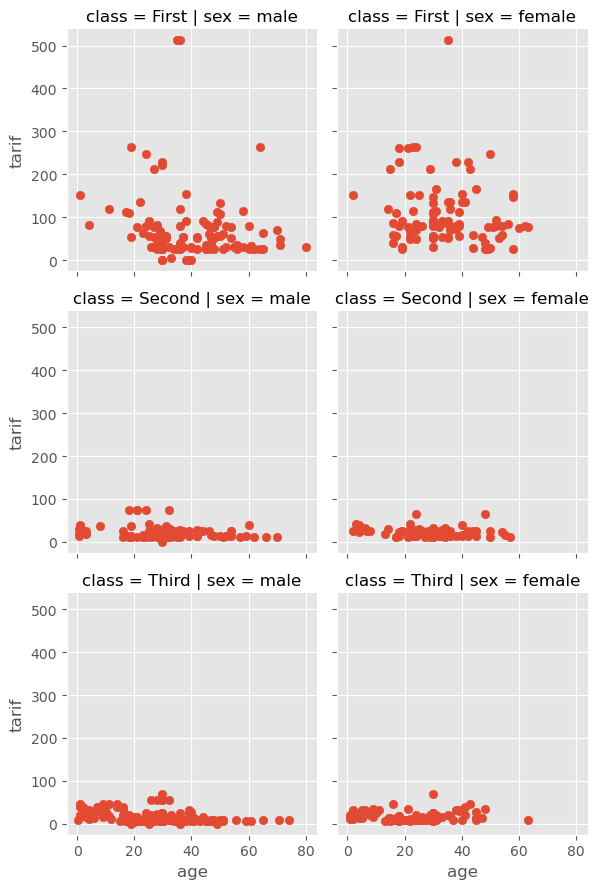

In [255]:
# Relation entre les variables "age" et "tarif" selon le sex et la class ou discretiser selon le sex et la class

sns.FacetGrid(titanic_df, col="sex", row='class').map(plt.scatter,'age','tarif').add_legend();

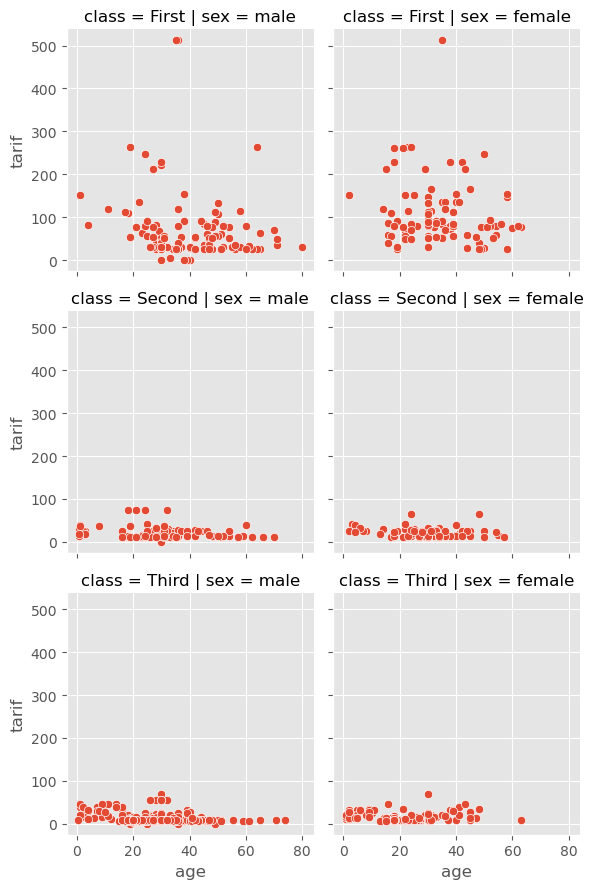

In [256]:
# Relation entre les variables "age" et "tarif" selon le sex et la class ou discretiser selon le sex et la class

t = sns.FacetGrid(titanic_df, col="sex", row='class')
t.map(sns.scatterplot, "age", "tarif");

## 2- Densité de point 2D

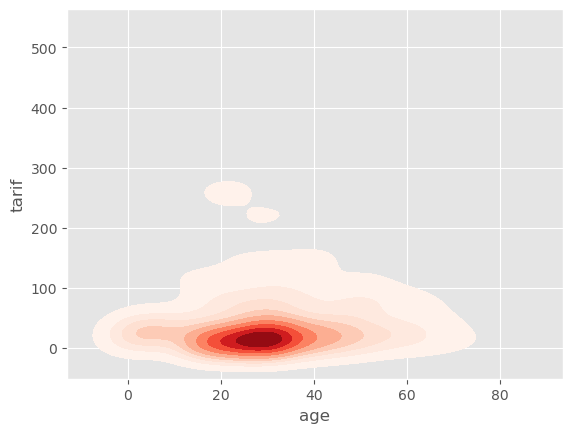

In [257]:
# Densité de point 2D (deux dimentions) entre les variables "age" et "tarif".

# Ce type de visualisation apprecié lorsqu'on a un grand nombre de point de données

sns.kdeplot(x='age', y='tarif', cmap='Reds',shade=True, data=titanic_df);

# on observe une forte concentration dans des points dans la couleurs rouge, dans l'intervale [20;40]

## 3- Relation entre variables qualitatives: tableau de contingence

In [258]:
titanic_df

,Survivant,pclass,sex,age,sibsp,dessécher,tarif,embarqué,class,genre,mâle_adulte,ville_embarquement,vivante,seule
0,0,3,male,22.00,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.00,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.00,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.00,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.00,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,0,3,female,39.00,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
780,1,1,female,19.00,0,0,30.0000,S,First,woman,False,Southampton,yes,True
781,0,3,female,29.87,1,2,23.4500,S,Third,woman,False,Southampton,no,False
782,1,1,male,26.00,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [259]:
# REMPLACER LES VARIABLES ET LES NAN PAR D'AUTRE NOM DE VARIABLE EXEMPLE

# DataFrame["variable"] = DataFrame.variable.replace(2.0:"married", 3.0:"divorced", np.nan:"Missing")

# DataFrame.fillna( DataFrame.maen(), inplace=True)       remplacé les NaN par la moyenne

## Tableau de contingence

In [260]:
# tableau de contingence entre les variable "sex" et "ville_embarquement" avec les effectifs, varible qualitative

pd.crosstab(titanic_df['sex'], titanic_df['ville_embarquement'])

# autre ecriture de code  pd.crosstab(titanic_df.sex, titanic_df.ville_embarquement)

ville_embarquement,Cherbourg,Queenstown,Southampton
sex,,,
female,71,26,194
male,84,33,374


In [261]:
# tableau de contingence entre les variable "genre" et "embarqué"  avec les effectifs, varible qualitative

pd.crosstab(titanic_df['genre'], titanic_df['embarqué'])

embarqué,C,Q,S
genre,,,
child,17,5,60
man,79,29,343
woman,59,25,165


In [262]:
# tableau de contingence entre les variable "sex" et "ville_embarquement" Normalisé dans les lignes avec les proportions

pd.crosstab(titanic_df['sex'], titanic_df['ville_embarquement']).apply(lambda z: z/z.sum(), axis=1)

ville_embarquement,Cherbourg,Queenstown,Southampton
sex,,,
female,0.243986,0.089347,0.666667
male,0.171079,0.067210,0.761711


In [263]:
# tableau de contingence entre les variable "genre" et "embarqué" Normalisé dans les lignes avec les proportions

pd.crosstab(titanic_df['genre'], titanic_df['embarqué']).apply(lambda z: z/z.sum(), axis=1)

embarqué,C,Q,S
genre,,,
child,0.207317,0.060976,0.731707
man,0.175166,0.064302,0.760532
woman,0.236948,0.100402,0.662651


In [264]:
# tableau de contingence entre les variable "sex" et "ville_embarquement" Normalisé dans les colonnes avec les proportions

pd.crosstab(titanic_df['sex'], titanic_df['ville_embarquement']).apply(lambda z: z/z.sum(), axis=0)

ville_embarquement,Cherbourg,Queenstown,Southampton
sex,,,
female,0.458065,0.440678,0.341549
male,0.541935,0.559322,0.658451


In [265]:
# tableau de contingence entre les variable "genre" et "embarqué" Normalisé dans les lignes avec les proportions

pd.crosstab(titanic_df['genre'], titanic_df['embarqué']).apply(lambda z: z/z.sum(), axis=0)

embarqué,C,Q,S
genre,,,
child,0.109677,0.084746,0.105634
man,0.509677,0.491525,0.603873
woman,0.380645,0.423729,0.290493


In [266]:
# tableau de contingence entre les variable "genre" et "embarqué" selon le sex

pd.crosstab([titanic_df['sex'], titanic_df['genre']], titanic_df['embarqué']).apply(lambda z: z/z.sum(), axis=1)

# autre ligne de code pour le meme resultat 
# pd.crosstab([titanic_df.sex, titanic_df.genre], titanic_df.embarqué).apply(lambda z: z/z.sum(), axis=1)

embarqué             C         Q         S
sex    genre                              
female child  0.285714  0.023810  0.690476
       woman  0.236948  0.100402  0.662651
male   child  0.125000  0.100000  0.775000
       man    0.175166  0.064302  0.760532

<AxesSubplot:xlabel='embarqué', ylabel='count'>

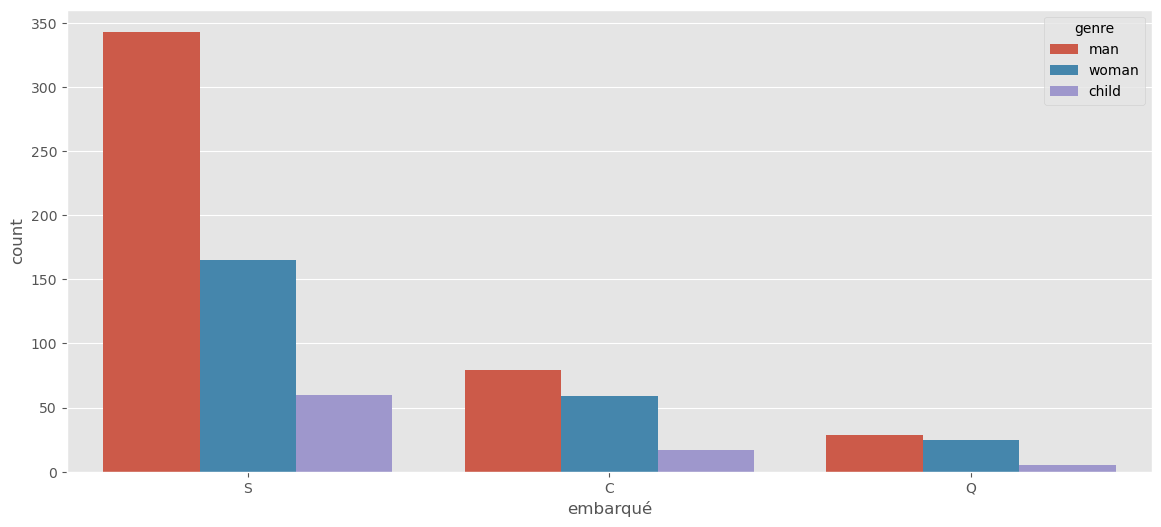

In [267]:
# Diagramme a barre montrant la classe "embarqué" selon le genre

plt.figure(figsize=(14,6))  # pour agrandire le graphique

sns.countplot(x = 'embarqué', hue = 'genre', data = titanic_df)

# l'argument "hue" pour afficher selon le genre choisi

## 4- Relation entre variables qualitatives et variables quantitatives

In [268]:
titanic_df

,Survivant,pclass,sex,age,sibsp,dessécher,tarif,embarqué,class,genre,mâle_adulte,ville_embarquement,vivante,seule
0,0,3,male,22.00,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.00,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.00,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.00,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.00,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,0,3,female,39.00,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
780,1,1,female,19.00,0,0,30.0000,S,First,woman,False,Southampton,yes,True
781,0,3,female,29.87,1,2,23.4500,S,Third,woman,False,Southampton,no,False
782,1,1,male,26.00,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


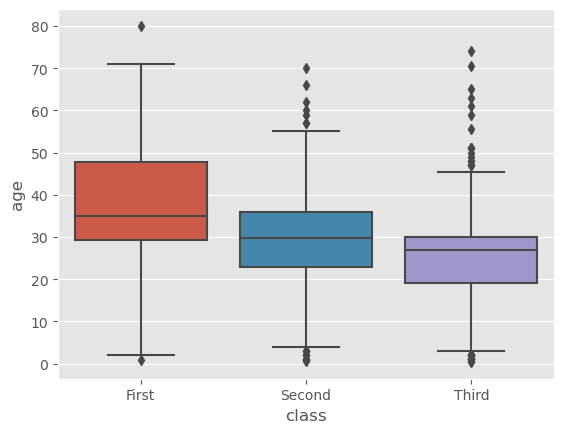

In [269]:
# Distribution des "age" selon la "class".  relation bivarié entre variables qualitative et quantutative
# toujours mettre la variable qualitative en abscice et la variable quantitative en ordornée, X=qualitative, Y=quantitative

# plt.figure(figsize=(12,4))   # pour agrandire le graphique ( boite à moustache)

sns.boxplot(x = 'class', y = 'age', data = titanic_df);

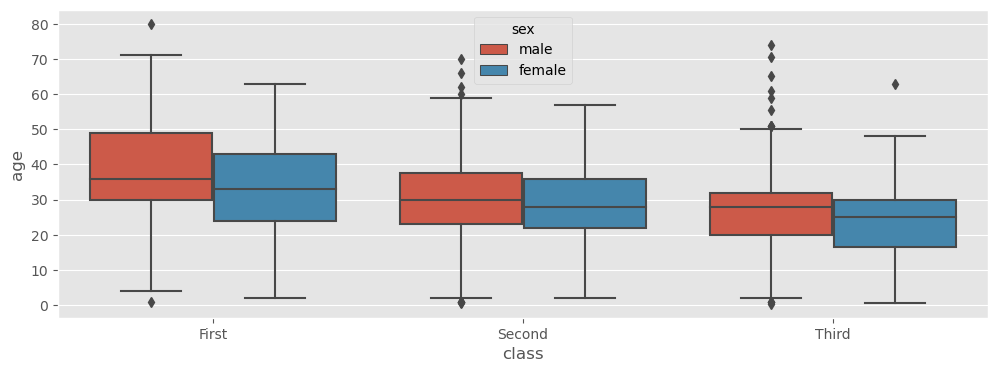

In [270]:
# Distribution des "age" selon la "class" et le "sex"

plt.figure(figsize=(12,4))   # pour agrandire le graphique ( boite à moustache)

sns.boxplot(x = 'class', y = 'age', hue = 'sex', data = titanic_df);

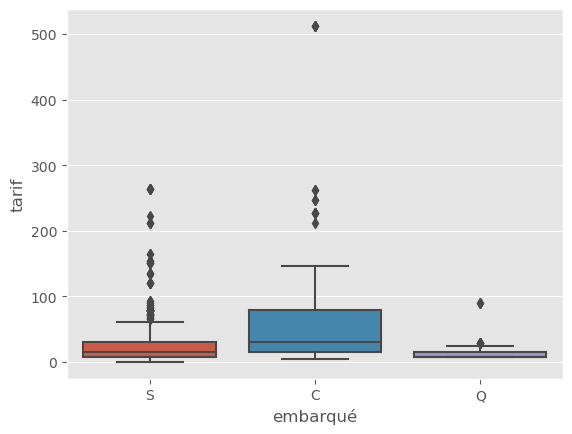

In [271]:
# Distribution des "tarif" en fonction la "embarqué" (boite à moustache)

sns.boxplot(x = 'embarqué', y = 'tarif', data = titanic_df);

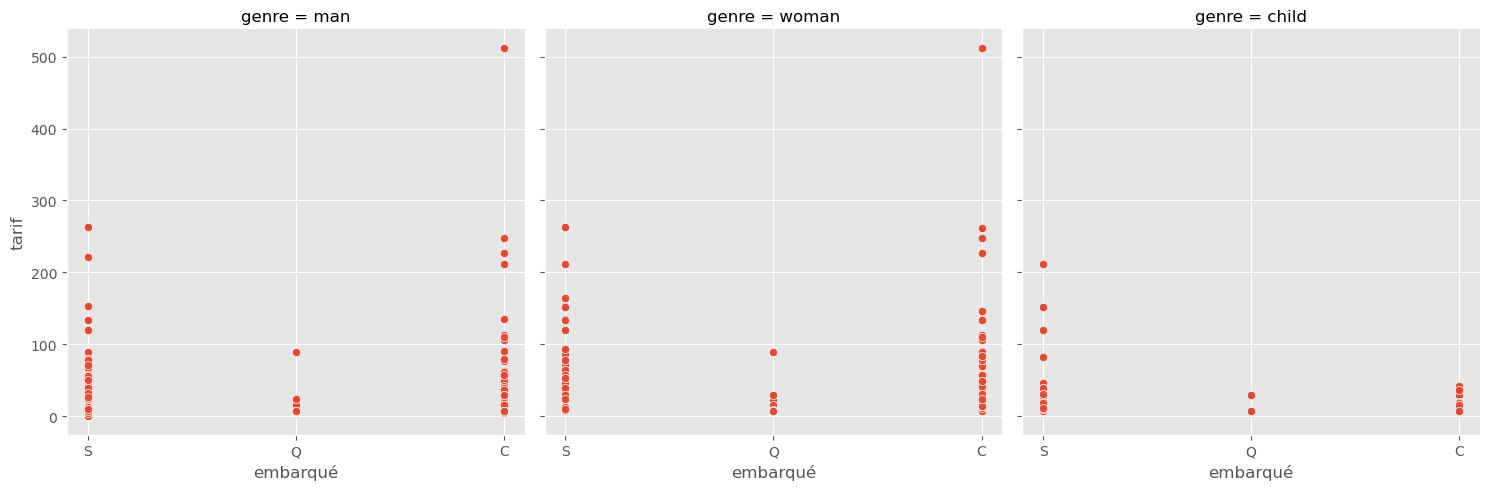

In [272]:
# Distribution des "tarif" en fonction la "embarqué" differenciée selon le "genre
# Nuage de point

sns.relplot(x = 'embarqué', y = 'tarif', col = 'genre', kind = 'scatter', data = titanic_df);

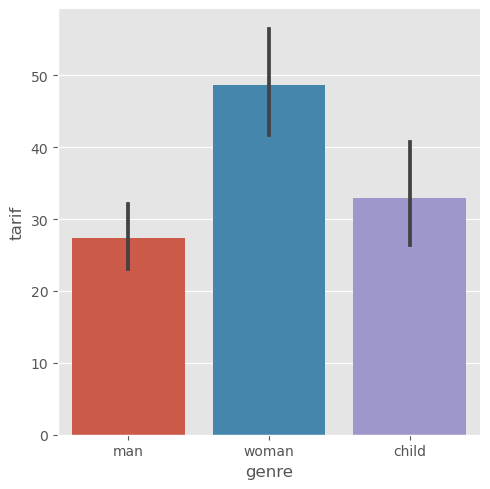

In [273]:
# Distribution des "tarif" en fonction la "genre" 
# Diagramme a barre

sns.catplot(x = 'genre', y = 'tarif', kind = 'bar', data = titanic_df)